In [154]:
#Importing Libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')


In [155]:
# Importing Dataset
df=pd.read_csv('Zoo.csv')
df.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


## EDA

In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [157]:
df.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [158]:
for c in df:
    print(df[c].value_counts())

frog        2
pony        1
sealion     1
seal        1
seahorse    1
           ..
gorilla     1
goat        1
gnat        1
girl        1
wren        1
Name: animal name, Length: 100, dtype: int64
0    58
1    43
Name: hair, dtype: int64
0    81
1    20
Name: feathers, dtype: int64
1    59
0    42
Name: eggs, dtype: int64
0    60
1    41
Name: milk, dtype: int64
0    77
1    24
Name: airborne, dtype: int64
0    65
1    36
Name: aquatic, dtype: int64
1    56
0    45
Name: predator, dtype: int64
1    61
0    40
Name: toothed, dtype: int64
1    83
0    18
Name: backbone, dtype: int64
1    80
0    21
Name: breathes, dtype: int64
0    93
1     8
Name: venomous, dtype: int64
0    84
1    17
Name: fins, dtype: int64
4    38
2    27
0    23
6    10
8     2
5     1
Name: legs, dtype: int64
1    75
0    26
Name: tail, dtype: int64
0    88
1    13
Name: domestic, dtype: int64
0    57
1    44
Name: catsize, dtype: int64
1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: type, dtype: i

In [159]:
df.isnull().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

## Visualization

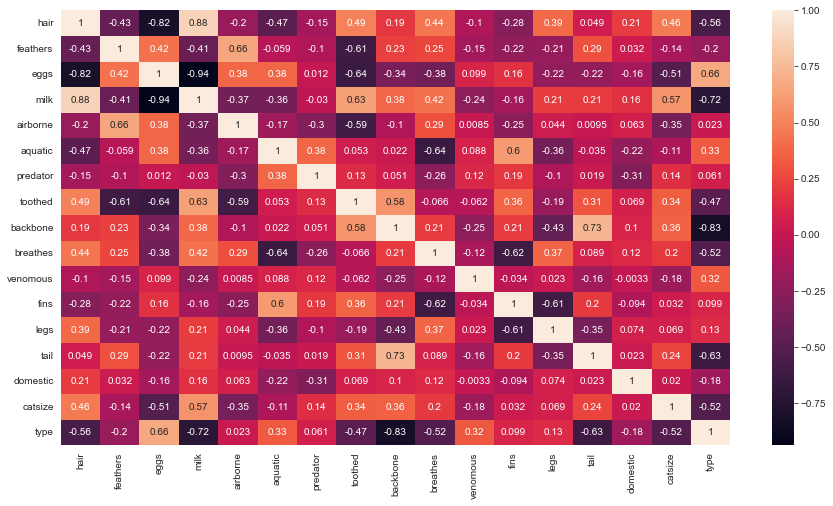

In [160]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

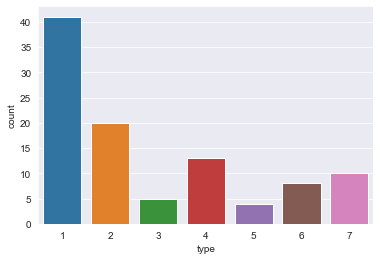

In [161]:
sns.countplot(df['type'])
plt.show()

In [162]:
df.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [163]:
df.rename(columns={'animal name':'animal_name'},inplace=True)

In [164]:
x=df.iloc[:,:17]
x

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [165]:
#Encoding
x=pd.get_dummies(x)

In [166]:
#LabelEncoding 
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
x['legs']=le.fit_transform(x['legs'])

In [167]:
pd.set_option('display.max_columns',160)
x

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,animal_name_aardvark,animal_name_antelope,animal_name_bass,animal_name_bear,animal_name_boar,animal_name_buffalo,animal_name_calf,animal_name_carp,animal_name_catfish,animal_name_cavy,animal_name_cheetah,animal_name_chicken,animal_name_chub,animal_name_clam,animal_name_crab,animal_name_crayfish,animal_name_crow,animal_name_deer,animal_name_dogfish,animal_name_dolphin,animal_name_dove,animal_name_duck,animal_name_elephant,animal_name_flamingo,animal_name_flea,animal_name_frog,animal_name_fruitbat,animal_name_giraffe,animal_name_girl,animal_name_gnat,animal_name_goat,animal_name_gorilla,animal_name_gull,animal_name_haddock,animal_name_hamster,animal_name_hare,animal_name_hawk,animal_name_herring,animal_name_honeybee,animal_name_housefly,animal_name_kiwi,animal_name_ladybird,animal_name_lark,animal_name_leopard,animal_name_lion,animal_name_lobster,animal_name_lynx,animal_name_mink,animal_name_mole,animal_name_mongoose,animal_name_moth,animal_name_newt,animal_name_octopus,animal_name_opossum,animal_name_oryx,animal_name_ostrich,animal_name_parakeet,animal_name_penguin,animal_name_pheasant,animal_name_pike,animal_name_piranha,animal_name_pitviper,animal_name_platypus,animal_name_polecat,animal_name_pony,animal_name_porpoise,animal_name_puma,animal_name_pussycat,animal_name_raccoon,animal_name_reindeer,animal_name_rhea,animal_name_scorpion,animal_name_seahorse,animal_name_seal,animal_name_sealion,animal_name_seasnake,animal_name_seawasp,animal_name_skimmer,animal_name_skua,animal_name_slowworm,animal_name_slug,animal_name_sole,animal_name_sparrow,animal_name_squirrel,animal_name_starfish,animal_name_stingray,animal_name_swan,animal_name_termite,animal_name_toad,animal_name_tortoise,animal_name_tuatara,animal_name_tuna,animal_name_vampire,animal_name_vole,animal_name_vulture,animal_name_wallaby,animal_name_wasp,animal_name_wolf,animal_name_worm,animal_name_wren
0,1,0,0,1,0,0,1,1,1,1,0,0,2,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,1,0,0,1,1,1,1,0,0,2,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,1,0,0,1,1,1,1,0,0,2,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
97,1,0,1,0,1,0,0,0,0,1,1,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [168]:
y=df.iloc[:,-1]


In [169]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=1)

##  Model Building

In [170]:
knn=KNeighborsClassifier()
knn.fit(xtrain,ytrain)
y_pred=knn.predict(xtest)
trainac=knn.score(xtrain,ytrain)
testac=knn.score(xtest,ytest)

print(f"Training Accuracy {trainac}\nTesting Accuracy {testac}")
print(classification_report(ytest,y_pred))

Training Accuracy 0.92
Testing Accuracy 0.8846153846153846
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00         5
           3       0.00      0.00      0.00         1
           4       0.67      1.00      0.80         2
           5       1.00      1.00      1.00         1
           6       0.50      1.00      0.67         2
           7       1.00      0.33      0.50         3

    accuracy                           0.88        26
   macro avg       0.74      0.76      0.71        26
weighted avg       0.90      0.88      0.86        26



## Hyperparameter Tuning

In [171]:
trainac=[]
testac=[]

for i in range(1,21):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(xtrain,ytrain)
    y_pred=knn.predict(xtest)


    trainac.append(knn.score(xtrain,ytrain))
    testac.append(knn.score(xtest,ytest))


In [172]:
trainac

[1.0,
 0.96,
 0.96,
 0.9333333333333333,
 0.92,
 0.8933333333333333,
 0.8666666666666667,
 0.88,
 0.8666666666666667,
 0.84,
 0.8133333333333334,
 0.8133333333333334,
 0.8133333333333334,
 0.8133333333333334,
 0.8133333333333334,
 0.8133333333333334,
 0.8133333333333334,
 0.8,
 0.8,
 0.8]

In [173]:
testac

[0.9615384615384616,
 0.9615384615384616,
 0.9615384615384616,
 0.8846153846153846,
 0.8846153846153846,
 0.8461538461538461,
 0.8076923076923077,
 0.8076923076923077,
 0.7692307692307693,
 0.7692307692307693,
 0.7692307692307693,
 0.7692307692307693,
 0.7692307692307693,
 0.7692307692307693,
 0.7692307692307693,
 0.7692307692307693,
 0.7692307692307693,
 0.7692307692307693,
 0.7692307692307693,
 0.7692307692307693]

Text(0, 0.5, 'Accuracy')

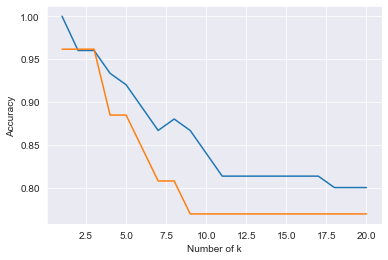

In [174]:
sns.set_style(style='darkgrid')

plt.plot(range(1,21),trainac)
plt.plot(range(1,21),testac)
plt.xlabel('Number of k')
plt.ylabel('Accuracy')

In [175]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(xtrain,ytrain)
y_pred=knn.predict(xtest)
trainac=knn.score(xtrain,ytrain)
testac=knn.score(xtest,ytest)

print(f"Training Accuracy {trainac}\nTesting Accuracy {testac}")
print(classification_report(ytest,y_pred))

Training Accuracy 0.96
Testing Accuracy 0.9615384615384616
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       0.83      1.00      0.91         5
           3       0.00      0.00      0.00         1
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         3

    accuracy                           0.96        26
   macro avg       0.83      0.86      0.84        26
weighted avg       0.93      0.96      0.94        26



In [176]:
from sklearn.metrics import accuracy_score
print(' accuracy =' ,accuracy_score(y_pred, ytest)*100)

 accuracy = 96.15384615384616


Text(92.68, 0.5, 'predicted score')

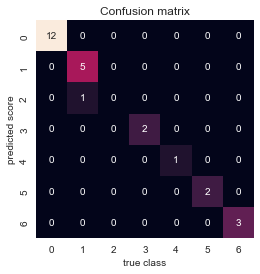

In [177]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(ytest, y_pred)
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False)

plt.title('Confusion matrix')
plt.xlabel('true class')
plt.ylabel('predicted score')